In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
crime_all = pd.read_csv("crime_weather_all_CLEANED.csv")
crime_x = pd.read_csv("crime_extreme_weather_CLEANED.csv")

C:\Users\Trevor\AppData\Local\Temp\ipykernel_2944\3032188402.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_all = pd.read_csv("crime_weather_all_CLEANED.csv")


In [10]:
crime_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4681 non-null   int64  
 1   Complaint_No             4681 non-null   int64  
 2   Property_Crimes          4681 non-null   object 
 3   Location_Type            4681 non-null   object 
 4   Zipcode                  4681 non-null   int64  
 5   Property_No              4657 non-null   float64
 6   Property_type            4657 non-null   object 
 7   Property_Desc            4657 non-null   object 
 8   2010 Pop                 4681 non-null   int64  
 9   Median Household Income  4681 non-null   float64
 10  Victim_Age               2495 non-null   float64
 11  Victim_Gender            2784 non-null   object 
 12  Victim_Ethnic            2784 non-null   object 
 13  DATE                     4681 non-null   object 
 14  EVENT_TYPE              

In [11]:
crime_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169595 entries, 0 to 169594
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               169595 non-null  int64  
 1   Complaint_No             169595 non-null  int64  
 2   Property_Crimes          169595 non-null  object 
 3   Location_Type            169595 non-null  object 
 4   Zipcode                  169595 non-null  int64  
 5   Property_No              168316 non-null  float64
 6   Property_type            168316 non-null  object 
 7   Property_Desc            168316 non-null  object 
 8   2010 Pop                 169595 non-null  int64  
 9   Median Household Income  169595 non-null  float64
 10  Victim_Age               82848 non-null   float64
 11  Victim_Gender            85326 non-null   object 
 12  Victim_Ethnic            85326 non-null   object 
 13  DATE                     169595 non-null  object 
 14  EVEN

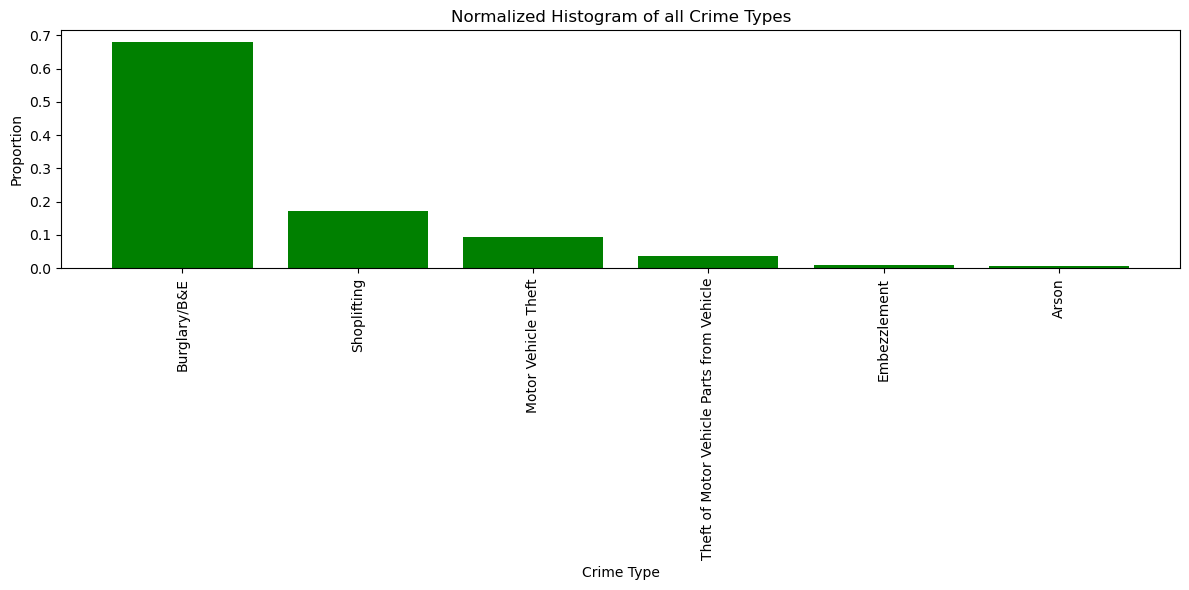

In [12]:
crime_count = crime_all['Property_Crimes'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.bar(crime_count.index, crime_count.values, color = 'green')
plt.xlabel("Crime Type")
plt.ylabel("Proportion")
plt.title("Normalized Histogram of all Crime Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

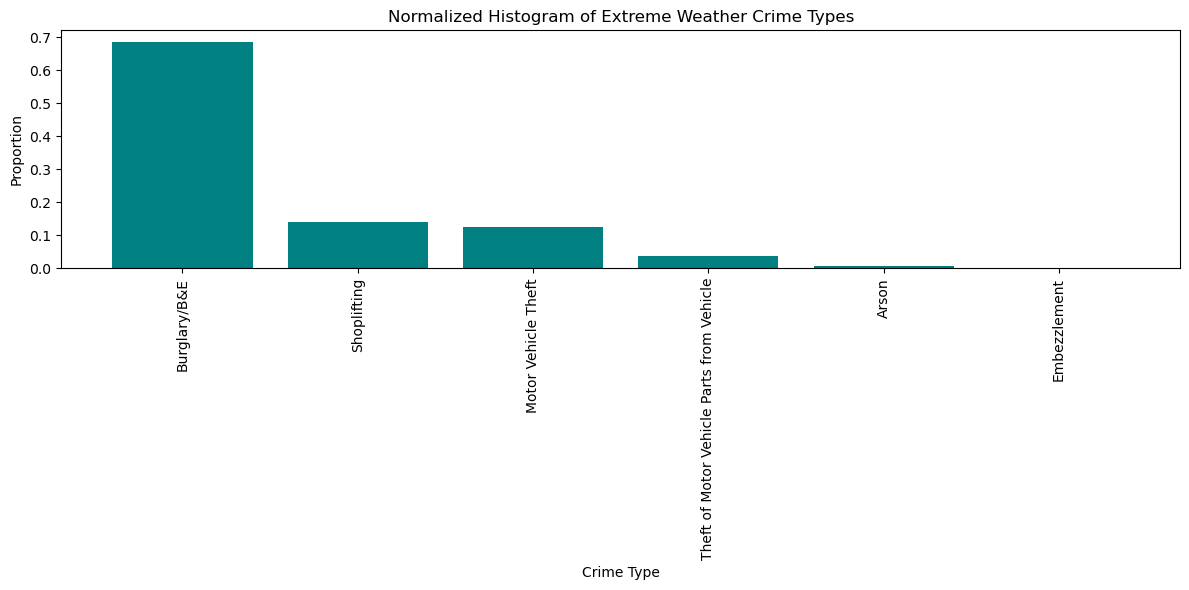

In [13]:
crime_count = crime_x['Property_Crimes'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.bar(crime_count.index, crime_count.values, color = 'teal')
plt.xlabel("Crime Type")
plt.ylabel("Proportion")
plt.title("Normalized Histogram of Extreme Weather Crime Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

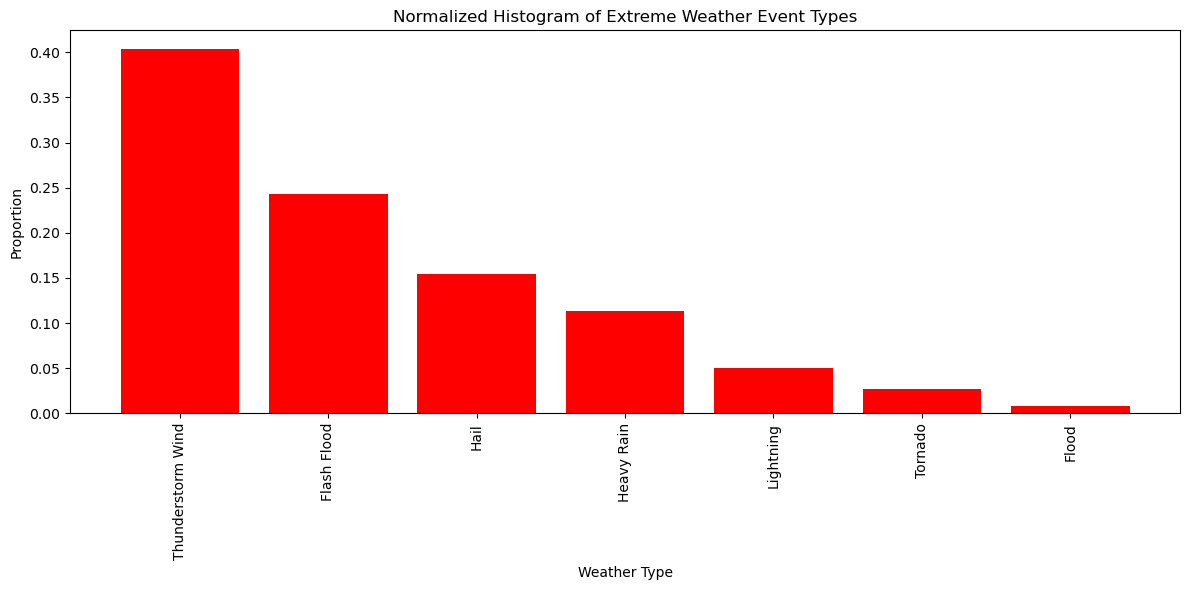

In [14]:
weather_count = crime_x['EVENT_TYPE'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.bar(weather_count.index, weather_count.values, color = 'red')
plt.xlabel("Weather Type")
plt.ylabel("Proportion")
plt.title("Normalized Histogram of Extreme Weather Event Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

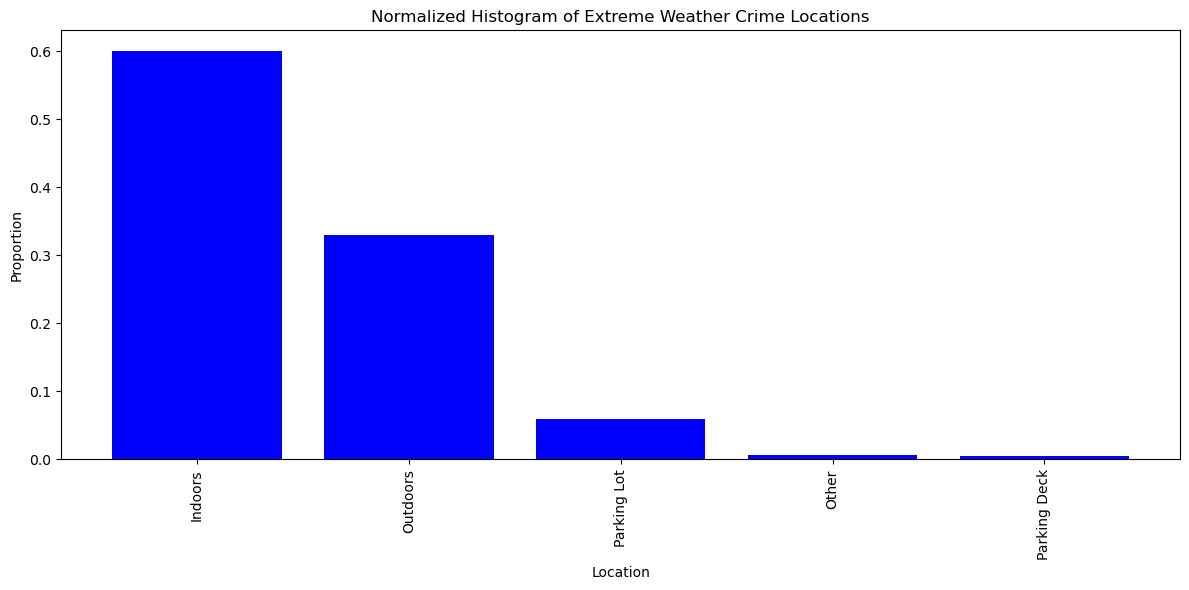

In [15]:
location_count = crime_x['Location_Type'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.bar(location_count.index, location_count.values, color = 'blue')
plt.xlabel("Location")
plt.ylabel("Proportion")
plt.title("Normalized Histogram of Extreme Weather Crime Locations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

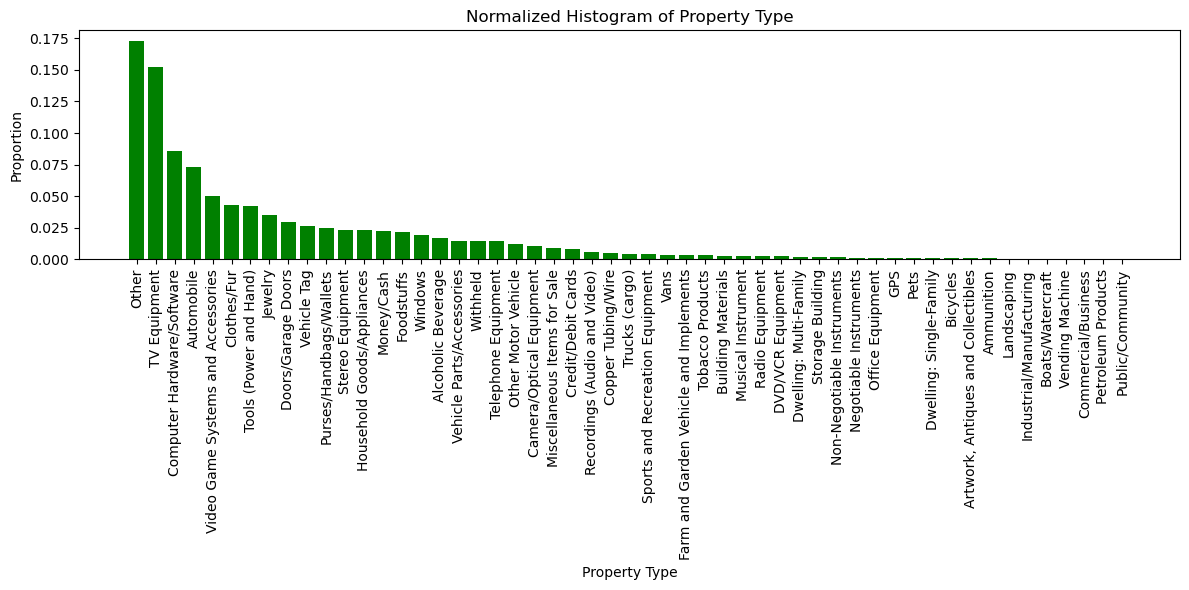

In [16]:
property_count = crime_x['Property_type'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.bar(property_count.index, property_count.values, color = 'green')
plt.xlabel("Property Type")
plt.ylabel("Proportion")
plt.title("Normalized Histogram of Property Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

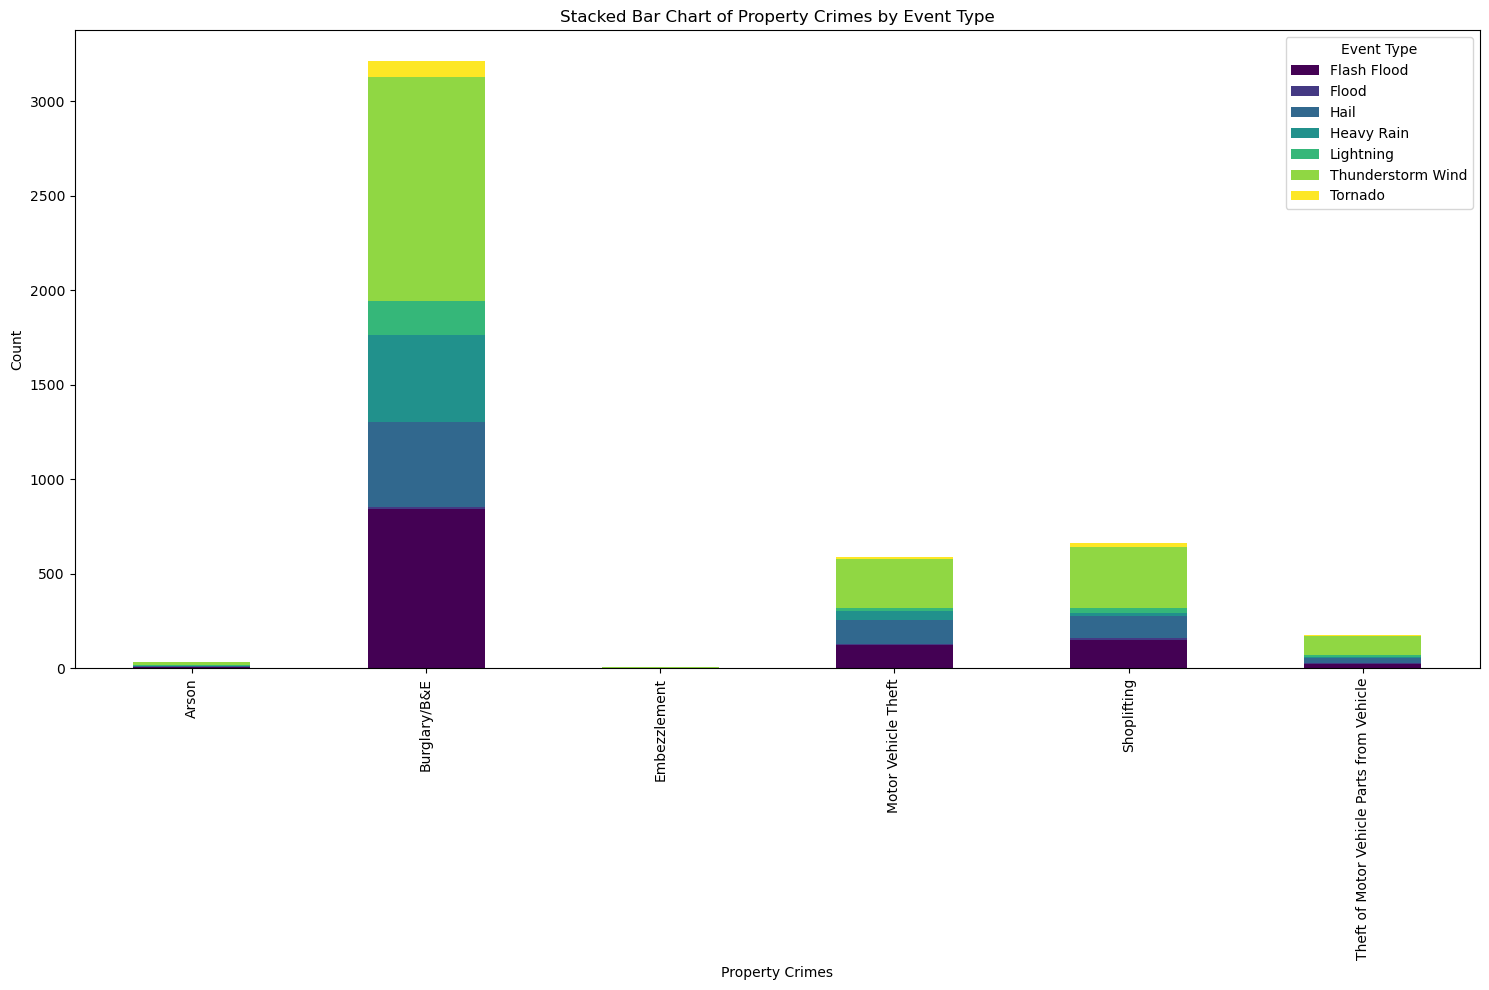

In [18]:
stacked_data = crime_x.groupby(['Property_Crimes', 'EVENT_TYPE']).size().unstack(fill_value=0)

stacked_data.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.xlabel("Property Crimes")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Property Crimes by Event Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Event Type")
plt.show()

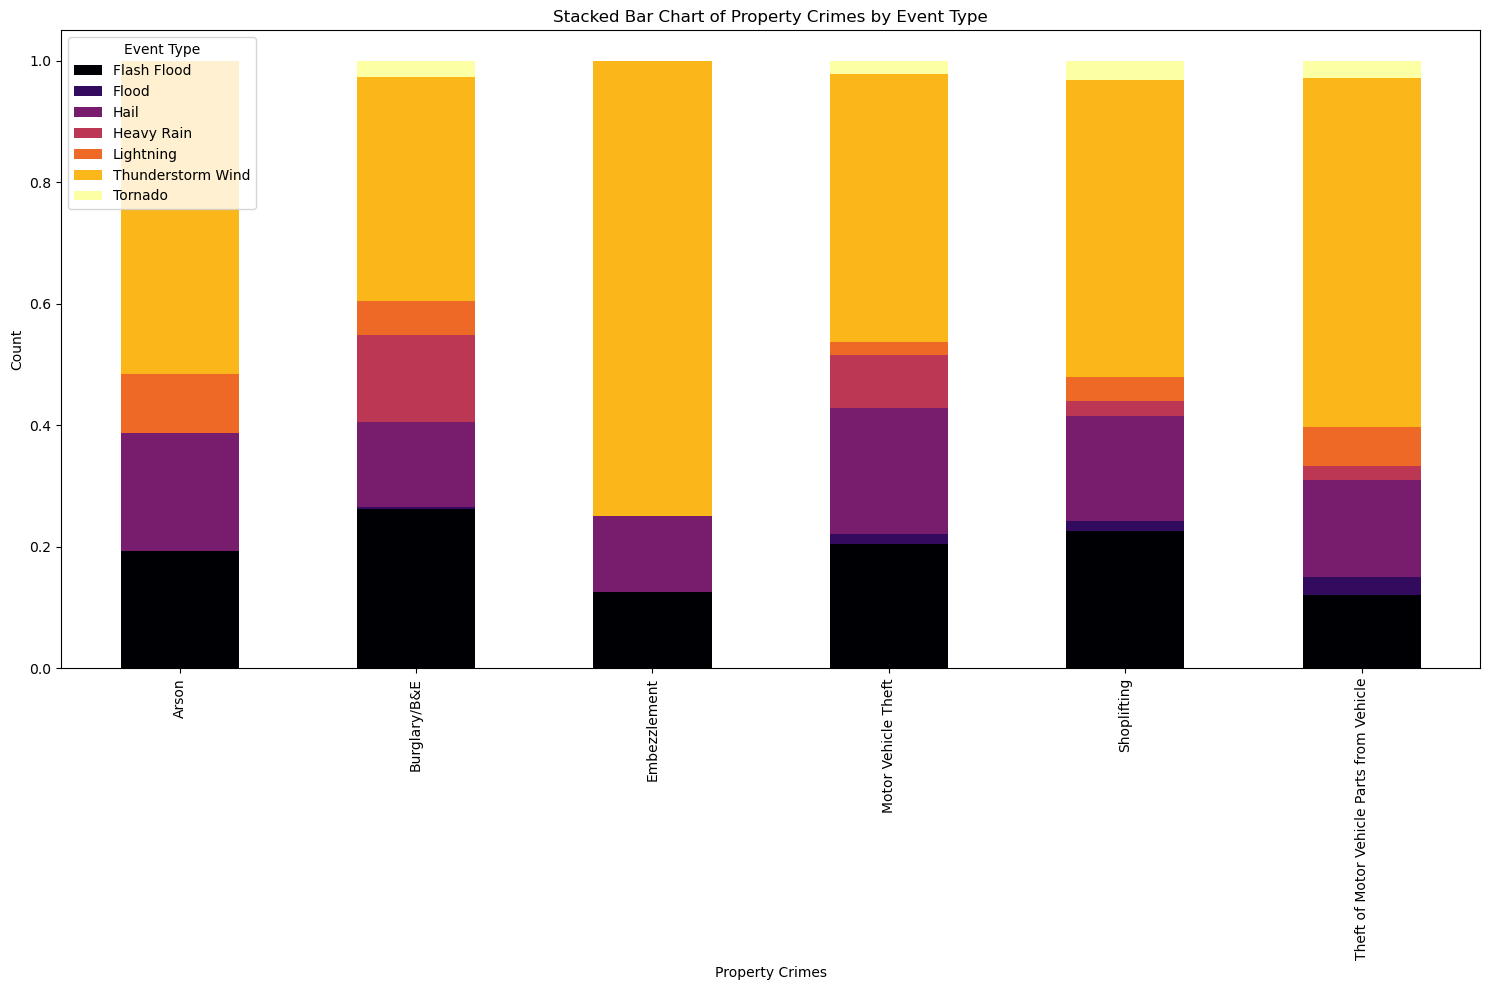

In [19]:
stacked_data = crime_x.groupby(['Property_Crimes', 'EVENT_TYPE']).size().unstack(fill_value=0)
stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)
stacked_data_normalized.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='inferno')
plt.xlabel("Property Crimes")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Property Crimes by Event Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Event Type")
plt.show()

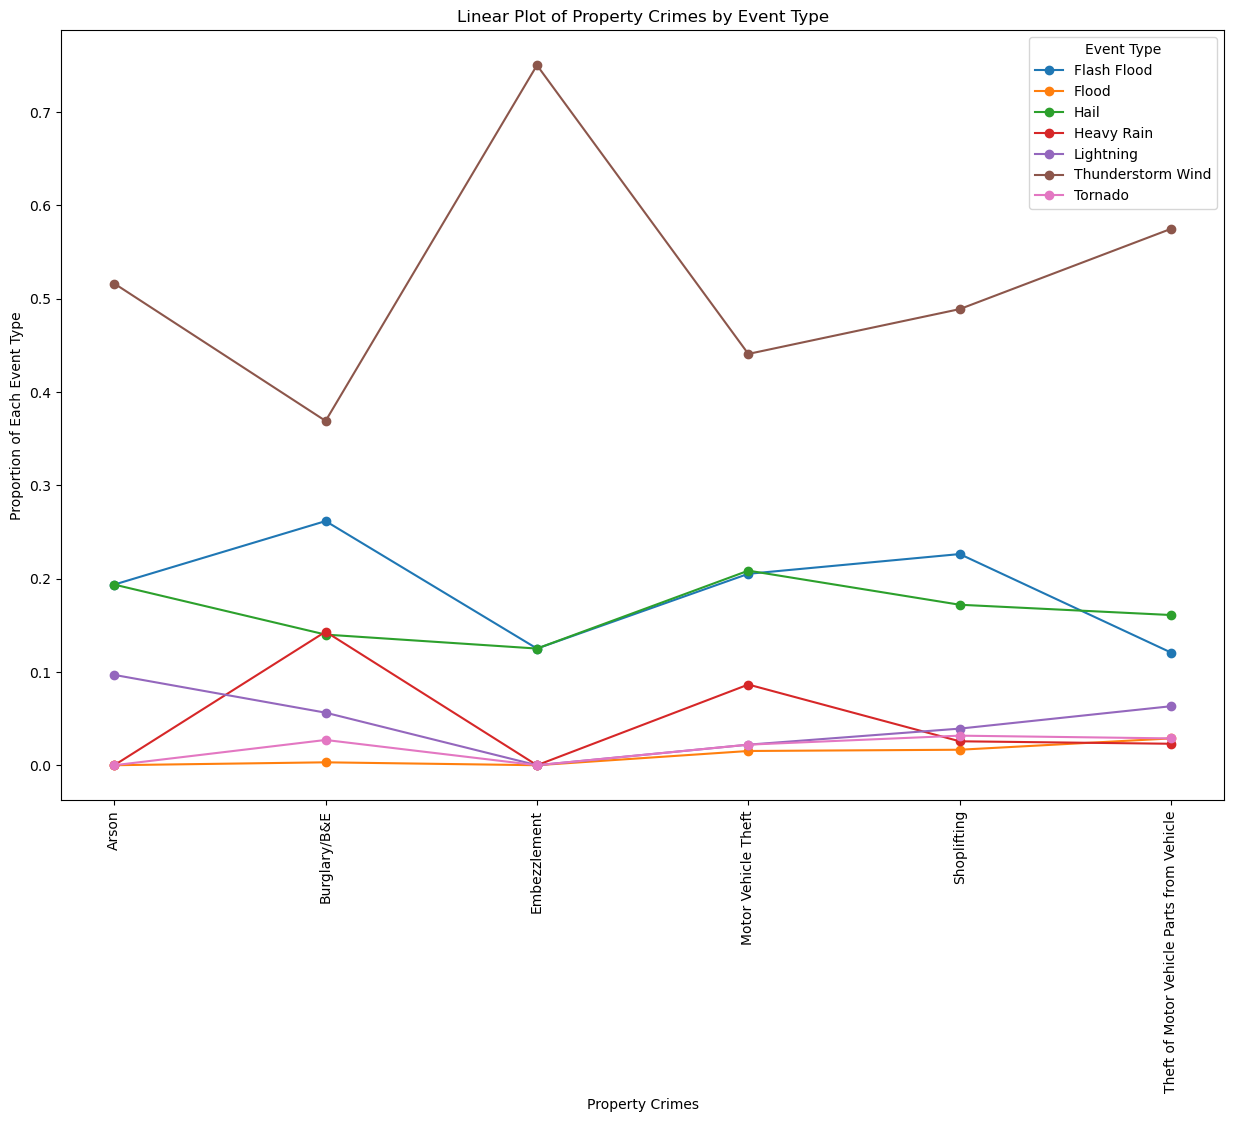

In [23]:
# Linear Plot of the Data
import matplotlib.pyplot as plt

# Assuming 'stacked_data_normalized' is already defined in the notebook
# Convert the data for linear plot
linear_data = stacked_data_normalized.reset_index()
linear_data_melted = linear_data.melt(id_vars='Property_Crimes', var_name='Event_Type', value_name='Proportion')

# Plotting
plt.figure(figsize=(15, 10))
for event_type in linear_data_melted['Event_Type'].unique():
    subset = linear_data_melted[linear_data_melted['Event_Type'] == event_type]
    plt.plot(subset['Property_Crimes'], subset['Proportion'], marker='o', label=event_type)

plt.xlabel('Property Crimes')
plt.ylabel('Proportion of Each Event Type')
plt.title('Linear Plot of Property Crimes by Event Type')
plt.xticks(rotation=90)
plt.legend(title='Event Type')
plt.show()